In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
%matplotlib inline

- plotly version 5.9.0

In [11]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

5.9.0


In [9]:
import cufflinks as cf

In [3]:
init_notebook_mode(connected=True)
cf.go_offline()

In [12]:
import plotly.graph_objects as go

In [13]:
sns.set_style("whitegrid")

In [14]:
df = pd.read_csv("911.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [16]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


### Top 5 zip codes for 911 calls:

In [26]:
df.value_counts("zip").nlargest(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
dtype: int64

### Top 5 townships for 911 calls:

In [27]:
df.value_counts("twp").nlargest(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
dtype: int64

### Unique title codes:

In [30]:
df["title"].nunique()

110

In [42]:
df["reason"] = df["title"].apply(lambda x: x.split(":")[0])

In [43]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,EMS


### Most common reason for 911 call:

In [44]:
df.value_counts("reason").nlargest(5)

reason
EMS        48877
Traffic    35695
Fire       14920
dtype: int64

<Axes: xlabel='reason', ylabel='count'>

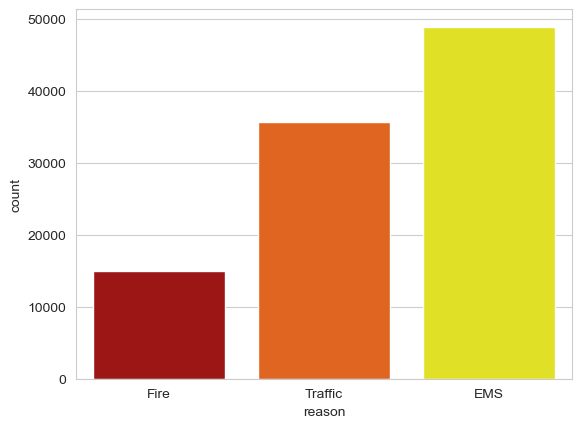

In [48]:
sns.countplot(df, x="reason", order = df["reason"].value_counts(ascending=True).index, palette = "hot")

In [56]:
print(df.dtypes["timeStamp"])

object


In [60]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

In [61]:
print(df.dtypes["timeStamp"])

datetime64[ns]


In [62]:
time = df["timeStamp"].iloc[0]
time.hour

17

In [69]:
df["hour"] = df["timeStamp"].apply(lambda x: x.hour)
df["month"] = df["timeStamp"].apply(lambda x: x.month)
df["day"] = df["timeStamp"].apply(lambda x: x.dayofweek)

In [70]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Reason,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,EMS,17,12,3


In [72]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [74]:
df["day"] = df["day"].map(dmap)

In [75]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Reason,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,EMS,17,12,Thu


<Axes: xlabel='reason', ylabel='hour'>

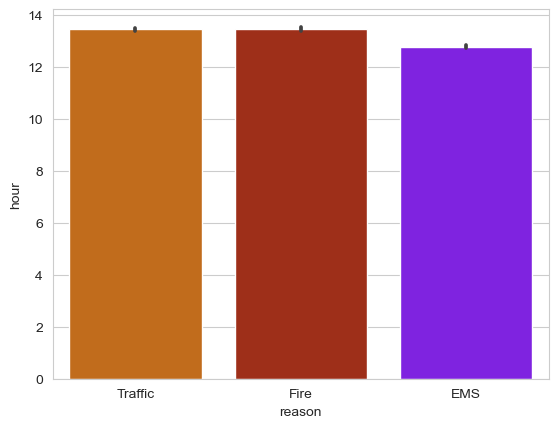

In [77]:
sns.barplot(x='reason',y='hour', data=df,palette='gnuplot_r',order=['Traffic','Fire','EMS'])

<Axes: xlabel='reason', ylabel='hour'>

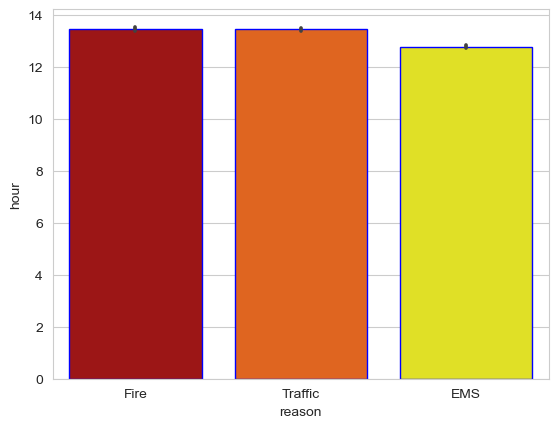

In [94]:
sns.barplot(data= df,
         x='reason', 
         y='hour',
        order=['Fire','Traffic','EMS'], 
           palette = "hot", 
           edgecolor = "blue")